# 0. INFORMAÇÕES DO GRUPO
---

# 1.0. Contexto

Este conjunto de dados clássico contém os preços e outros atributos de quase 54.000 diamantes.

O nosso objetivo é tentar prever os preços ideais para a venda dos diamantes, de acordo com algumas variáveis que irão ser descritas na seção 3.

# 2.0. IMPORTAÇÕES
---

## 2.1. Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import RobustScaler

## 2.2. Dados

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/aime-n/lasso-aprendizado/main/trab/data/diamonds.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
# Retirando a primeira coluna (index)
df = df.iloc[:, 1:]
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## 2.3. Funções

In [ ]:
def print_is_duplicated(df):
    """
    Função que verifica se os dados estão duplicados. Se sim,
    mostra a quantidade de dados duplicados.
    """
    confirmation = df.duplicated().values.any()
    print(f"Existem valores duplicados? {confirmation}")
    if confirmation == True:
        print(f"Existem no total {df.duplicated().sum()} linhas duplicadas.")
    else:
        print('Não existem linhas duplicadas.')

# 3.0. DESCRIÇÃO DOS DADOS
---

## 3.1. Descrição das variáveis

As descrições abaixo foram todas obtidas no site do dataset (Kaggle):

- ``price``: preço em dólares ($\$$326 até $\$$18,823).

- ``carat``: peso em quilate do diamante (0.2 até 5.01).*

- ``cut``: qualidade do corte na ordem crescente: *Fair*, *Good*, *Very Good*, *Premium* e *Ideal*

- ``color``: cor do diamante, do D (melhor) até o J (pior).

- ``clarity``: uma medida de quão claro o diamante é. Seguindo a ordem a seguir, vai do pior até o melhor: (I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF).

- ``x``: comprimento em mm (0 até 10.74).

- ``y``: largura em mm (0 até 58.9).

- ``z``: espessura em mm (0 até 31.8).

- ``depth``: Porcentagem da espessura = $\frac{z}{\frac{(x+y)}{2}}$ (43--79).

- ``table``: largura do topo do diamante em relação ao ponto mais largo (43--95).

## 3.2. Tipos das variáveis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


Os tipos das variáveis estão de acordo com as características delas.

## 3.3. Verificação de valores nulos

In [ ]:
# Soma de valores nulos por coluna
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

Não existem valores nulos neste dataset, portanto nenhuma manipulação dos dados será necessária.

## 3.4. Valores duplicados

In [ ]:
# Verifica se existem valores duplicados
print_is_duplicated(df)

Existem valores duplicados? True
Existem no total 146 linhas duplicadas.


In [ ]:
# Porcentagem dos valores duplicados
duplicated_pct = round(df.duplicated().sum() / len(df) * 100, 2)
print(f"Existem {duplicated_pct}% linhas duplicadas neste dataset.")

Existem 0.27% linhas duplicadas neste dataset.


Como existem 0.27% linhas duplicadas no nosso conjunto, vamos excluí-las na seção 4.

## 3.5. Outliers

In [ ]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Observamos um desvio padrão muito alto na variável ``price``, sendo até maior que a própria média. Vamos verificar o boxplot com esses valores.

Resolvemos não retirar os outliers, pois os preços dos diamantes podem acabar variando muito, dependendo das outras características. Então assumimos que é são valores muito acima do esperado mas que são condizente com a realidade.

# 4.0. MANIPULAÇÃO DOS DADOS
---

## 4.1. Remoção dos valores duplicados

Conforme na seção 3.4, verificamos que existiam 146 linhas duplicadas, e desta forma, resolvemos removê-las.

In [ ]:
# Remove as linhas duplicadas
df = df.drop_duplicates()

print(f"Este dataset possui {df.shape[0]} linhas e {df.shape[1]} colunas.")
df.head()

Este dataset possui 53794 linhas e 10 colunas.


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# 5.0. ANÁLISE EXPLORATÓRIA DOS DADOS
---

## 5.1. Análise de uma variável

### 5.1.1. Variável Resposta

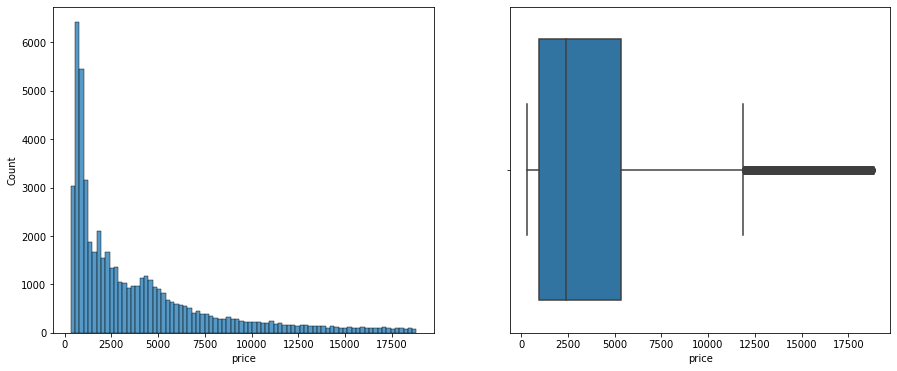

In [ ]:
fig=plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
ax=sns.histplot(x='price', data=df,palette="viridis")
plt.subplot(1,2,2)
ax=sns.boxplot(x='price', data=df)
plt.show()

Verificamos a existencia de calda longa à direita e de muitos outliers.

## 5.1.2. Variáveis Categóricas

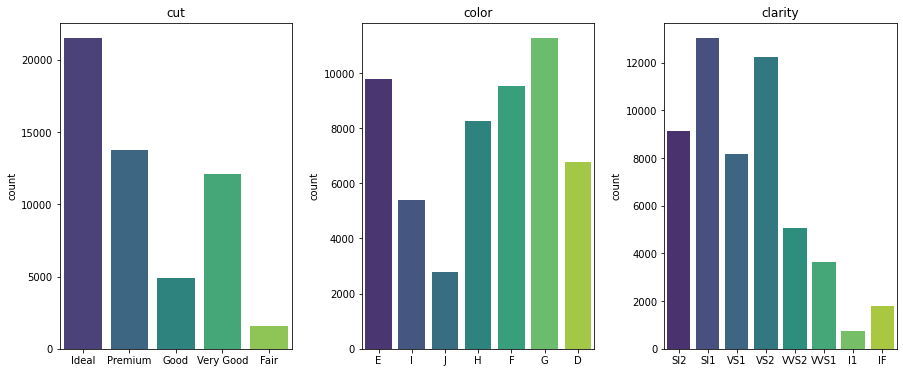

In [ ]:
cate=['cut','color','clarity']
fig=plt.figure(figsize=(15,6))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
for i in range(1, 4):
    plt.subplot(1, 3, i)
    ax = sns.countplot(x=cate[i-1], data=df, palette="viridis", 
                       #order=np.unique(data[infos[i-1]].values).tolist()
                       )
    plt.xticks(rotation=0)
    plt.xlabel('')
    plt.title(cate[i-1])
plt.show()

* Nosso conjunto de dados contém muitas observações com o corte "ideal".
* Os dados estão bem desbalanceados para cada categoria de cada variável.



## 5.1.3. Variáveis Quantitativas

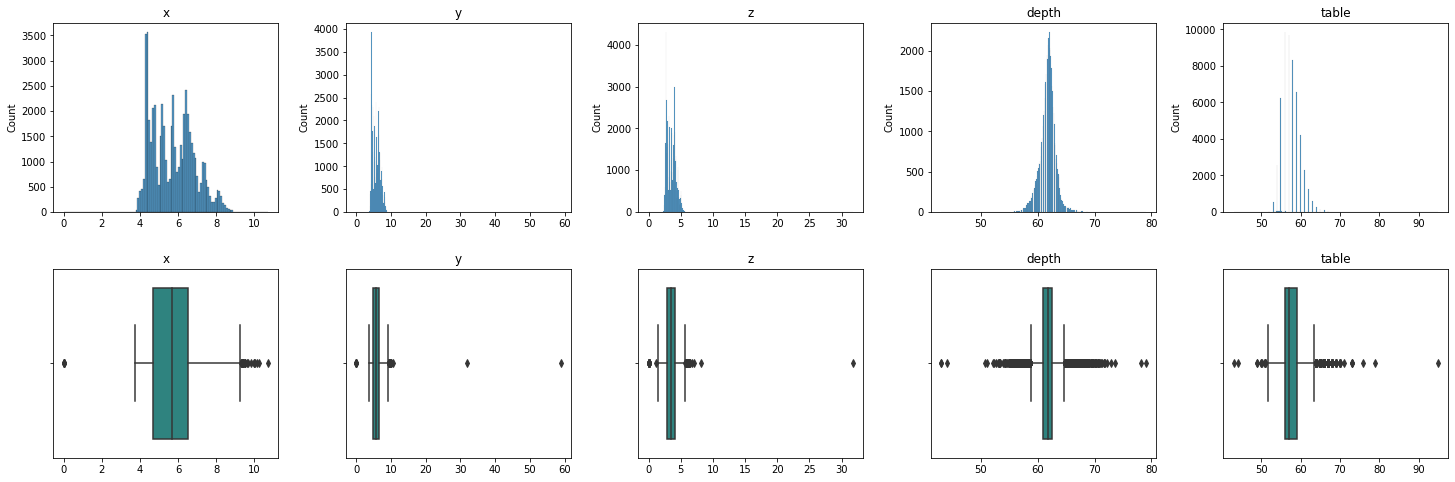

In [ ]:
quant=['x','y','z','depth','table']
fig=plt.figure(figsize=(25,8))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
for i in range(1, 6):
    plt.subplot(2, 5, i)
    ax = sns.histplot(x=quant[i-1], data=df, palette="viridis", 
                       #order=np.unique(data[infos[i-1]].values).tolist()
                       )
    plt.xticks(rotation=0)
    plt.xlabel('')
    plt.title(quant[i-1])

for i in range(1, 6):
    plt.subplot(2, 5, i+5)
    ax = sns.boxplot(x=quant[i-1], data=df, palette="viridis", 
                       #order=np.unique(data[infos[i-1]].values).tolist()
                       )
    plt.xticks(rotation=0)
    plt.xlabel('')
    plt.title(quant[i-1])
plt.show()

* Para a variável "depth", temos uma distribuição muito simétrica, lembrando uma distribuição normal 
* Existem outliers em todas as variáveis quantitativas. Apesar disso, resolvemos não descartá-los porque, em nosso contexto de negócio, isso pode ser normal.

## 5.2. Análise de duas variáveis

### 5.2.1. Variáveis Categóricas x price

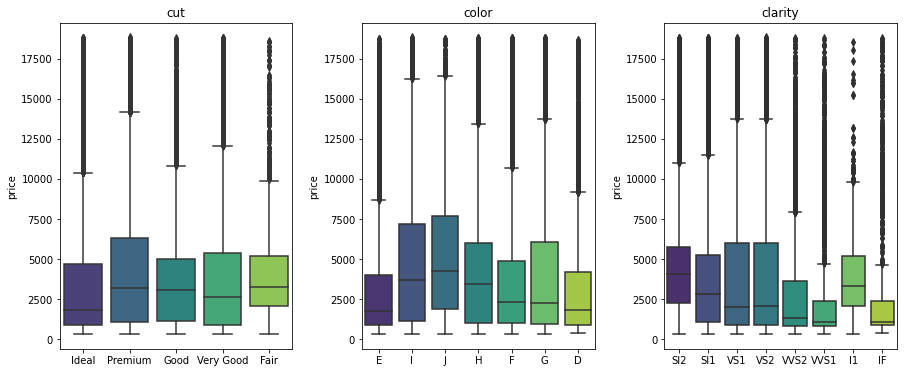

In [ ]:
cate=['cut','color','clarity']
fig=plt.figure(figsize=(15,6))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
for i in range(1, 4):
    plt.subplot(1, 3, i)
    ax = sns.boxplot(y='price',x=cate[i-1], data=df, palette="viridis", 
                       #order=np.unique(data[infos[i-1]].values).tolist()
                       )
    plt.xticks(rotation=0)
    plt.xlabel('')
    plt.title(cate[i-1])
plt.show()

* Há presença de muitos outliers nos 3 gráficos.
* No segundo  gráfico, apesar da cor "J" possuir uma classificação baixa, sua mediana é a maior entre os todas as cores. Além disso, a caixa de "J" está mais acima em relação às outras, indicando uma maior faixa de preços.
* Por fim, a classificação "IF" é a maior em limpidez, porém ela possui uma das menores medianas.

### 5.2.2. Variáveis Numéricas x price

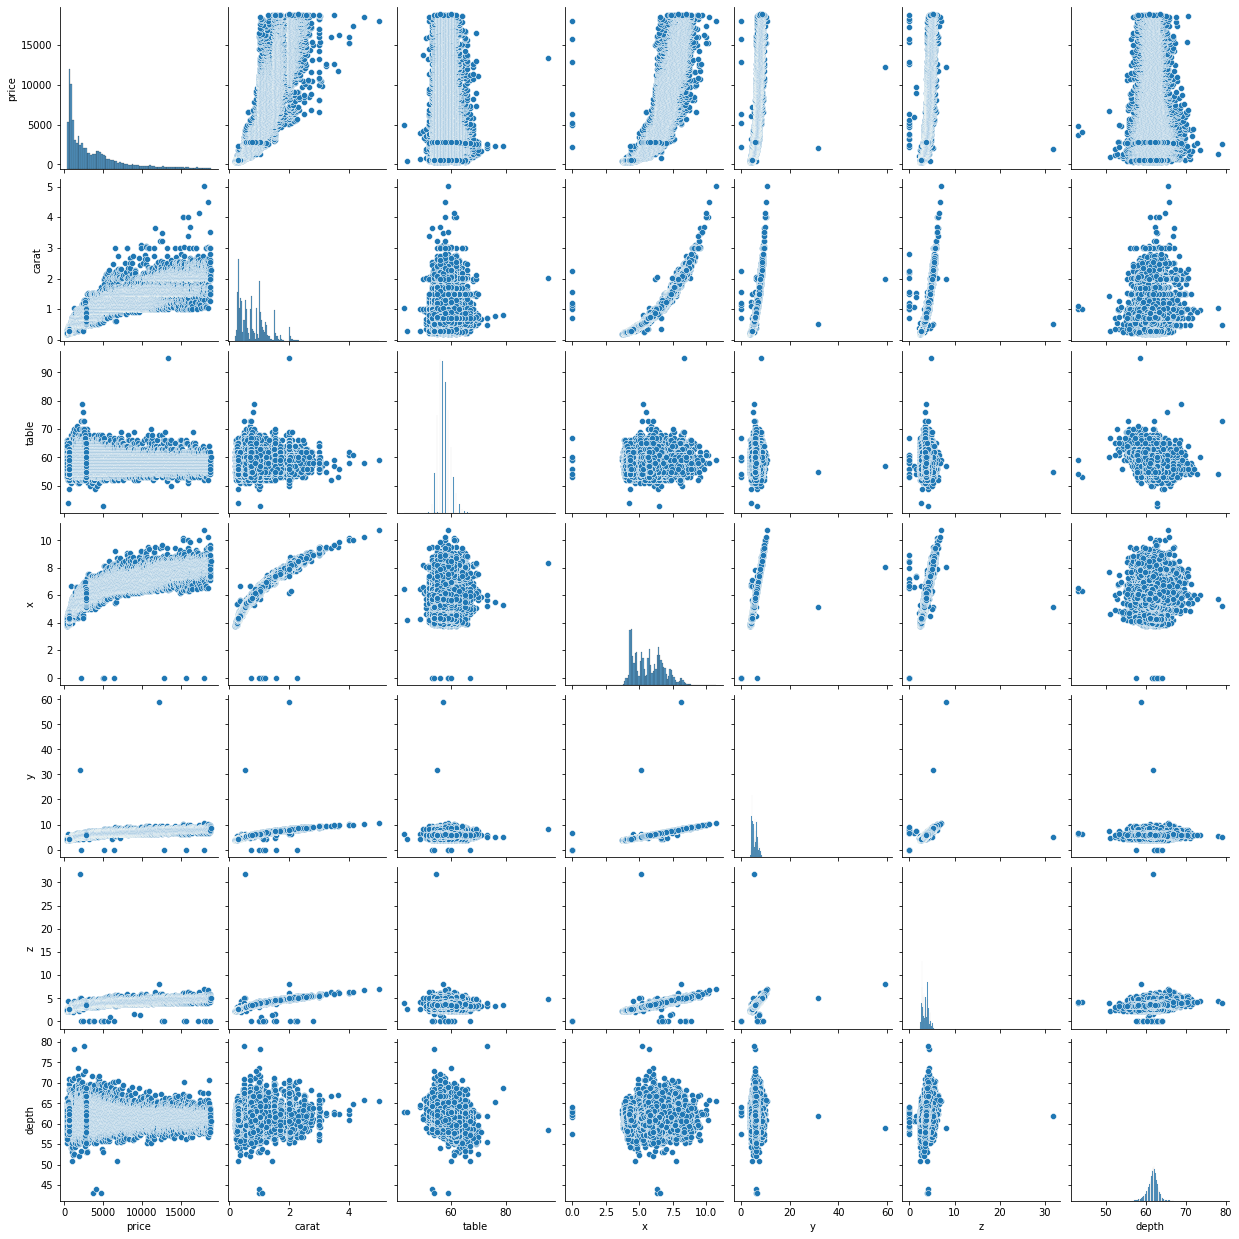

In [ ]:
sns.pairplot(df[['price', 'carat', 'table', 'x', 'y', 'z', 'depth']],palette="viridis");

Mapa de correlações:

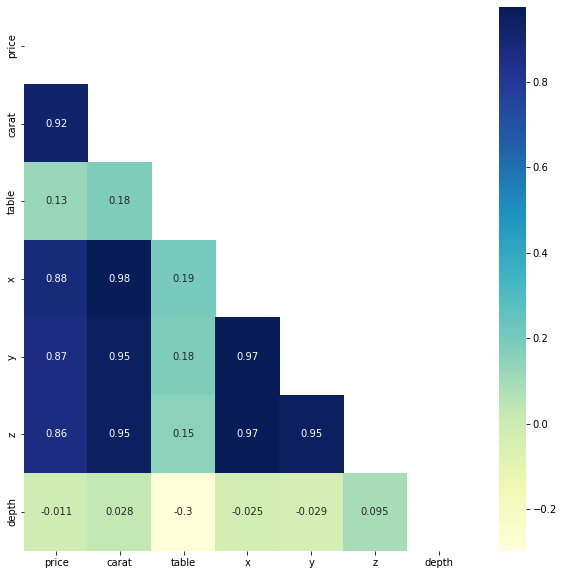

In [ ]:
# Mapa de correlações
plt.figure(figsize=(10,10))
corr = df[['price', 'carat', 'table', 'x', 'y', 'z', 'depth']].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, mask=mask, cmap="YlGnBu", annot=True);


Note que "x", "y" e "z" estão fortemente correlacionadas com a variável "carat". Dessa forma, resolvemos removê-las do modelo, uma vez que "carat" já explica essas três variáveis e menos variáveis deixa o modelo mais simples.

# 6.0. PRÉ-PROCESSAMENTO DOS DADOS
---

In [ ]:
#Cópia do dataframe
df6 = df.copy()

## 6.1. Encoding

O processo de enconding transforma as variáveis categóricas oridinais em numéricas para facilitar a modelagem.

Na transformação, convencionamos que quanto maior o valor numérico, maior nível categórico, de forma proporcional. 





In [ ]:
# Definição das variáveis numéricas e categóricas

var_num = ['carat','depth', 'table']
var_cat = ['cut', 'color', 'clarity']

# Ordenação das variáveis
df6 = df6[['carat', 'depth', 'table', 'cut', 'color', 'clarity', 'price']]

# Dicionário para encoding
cut = {'Fair':1, 'Good':2, 'Very Good':3, 'Premium':4, 'Ideal':5}
color = {'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7}
clarity = {'I1':1,  'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8}

# Encoding das variáveis categóricas
df6['cut'] = df6['cut'].replace(cut)
df6['color'] = df6['color'].replace(color)
df6['clarity'] = df6['clarity'].replace(clarity)

In [ ]:
df6.head()

,carat,depth,table,cut,color,clarity,price
0,0.23,61.5,55.0,5,6,2,326
1,0.21,59.8,61.0,4,6,3,326
2,0.23,56.9,65.0,2,6,5,327
3,0.29,62.4,58.0,4,2,4,334
4,0.31,63.3,58.0,2,1,2,335


## 6.2. Divisão dos dados em Treino e Teste

Dividimos o dataframe que será utilizado nos métodos de regressão analisados em 80% para treino e 20% para teste.

In [ ]:
# Variável dependente e independentes
X = df6.drop('price', axis=1).values

y = df6['price'].values

In [ ]:
# 80% para treino, e 20% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 6.3. Rescaling

Utilizamos a técnica de Robust Scaler para a padronização dos dados pois o conjunto de dados contém outliers, e esse método utiliza os quantis para a padronização, lidando melhor do que a técnica de Standard Scaler e MinMax Scaler nessa situação.

In [ ]:
# Definindo o robust scaler
rs = RobustScaler()

# Transformando as colunas
X_train[:, :5] = rs.fit_transform(X_train[:, :5])
X_test[:, :5] = rs.transform(X_test[:, :5])